In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
import math as m
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Представляет собой прототип системы поиска, классификации и визуализация аномалий в информации между базами вылова и переработки рыбопродуктов внутри РФ с выводом результатов в машиночитаемом и человекочитаемом виде.

Технический эксперт оценивает решение
по следующим критериям:
1. Запускаемость кода
2. Обоснованность выбранного метода (описание подходов к решению,
их обоснование и релевантность задаче)
3. Точность работы алгоритма (возможность оценить формальной
метрикой с обоснованием выбора)
4. Адаптивность/Масштабируемость
5. Отсутствие в решении импортного ПО и библиотек, кроме свободно
распространяемого с обоснованием выбора
6. Наличие интеграционных интерфейсов, в первую очередь
интерфейсов загрузки данных

Отраслевой эксперт и/или представитель
Кейсодержателя оценивает решение
по следующим критериямм:
1. Релевантность поставленной задаче (команда погрузилась в отрасль,
проблематику; предложенное решение соответствует поставленной
задаче; проблема и решение структурированы)
2. Уровень реализации (концепция/прототип и тд)
3.Проработка пользовательских историй (UX/UI)
4. Реализация в решении требований Заказчика Вывод результатов
в машиночитаемом и человекочитаемом виде
5. Выступление команды (умение презентовать результаты своей
работы, строить логичный, понятный и интересный рассказ
для презентации результатов своей работы)

1) catch и product слить в одну бд, и ext1 и 2
2) построить графики зависимости - по оси даты, какой корабль приносит какой тип рыбы - или сразу ищем кластеризацией, kmeans например
3) Посмотреть как вариант PCA + The Mahalanobis distance is widely used in cluster analysis and classification techniques. In order to use the Mahalanobis distance to classify a test point as belonging to one of N classes, one first estimates the covariance matrix of each class, usually based on samples known to belong to each class. In our case, as we are only interested in classifying “normal” vs “anomaly”, we use training data that only contains normal operating conditions to calculate the covariance matrix. Then, given a test sample, we compute the Mahalanobis distance to the “normal” class, and classifies the test point as an “anomaly” if the distance is above a certain threshold

In [1]:
ls

Fish_f.ipynb      Fish_fraud.ipynb  db1/              db2/


In [7]:
catch = pd.read_csv("catch.csv")

In [8]:
catch.head(5)

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own
0,4524386,2022-01-01,272,400,31.874,41,852296,7115834
1,474886,2022-01-01,277,886,0.476,1,5401178,1809581
2,3160994,2022-01-01,116,409,26.310,15,3869431,5258490
3,1234400,2022-01-01,272,292,9.541,1,2169057,1809581
4,1234400,2022-01-01,272,113,0.062,1,2169057,1809581


In [9]:
product = pd.read_csv("product.csv")

In [10]:
product.head(5)

,id_ves,date,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
0,1491364,2022-01-01,1,10128,0.102,8.234
1,7014122,2022-01-01,3,3901,0.000,42.780
2,8958321,2022-01-01,1,1113,0.000,0.050
3,8958321,2022-01-01,1,1135,0.000,4.300
4,8958321,2022-01-01,1,4648,0.000,0.225


In [14]:
ext1 = pd.read_csv("Ext.csv")
ext2 = pd.read_csv("Ext2.csv")

In [15]:
ext1.head(5)

,id_fishery,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
0,2208303,6493928,2022-05-24 00:00:00,\N,5022636,8745666,\N,\N,\N
1,5538439,3846064,2022-05-24 00:00:00,\N,839830,3846313,\N,\N,\N
2,8688535,3107158,2022-05-24 00:00:00,\N,9310751,5215676,\N,\N,\N
3,8688535,3107158,2022-05-24 00:00:00,\N,9310751,4008716,\N,\N,\N
4,9102536,6493928,2022-05-24 00:00:00,\N,2900344,8522784,\N,\N,\N


In [16]:
ext2.head(5)

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7230988,8934601,400,минтай,2022-01-01 00:39:56,75480,\N
1,3420538,1439843,400,минтай,2022-01-01 01:34:08,62586,\N
2,9509257,342637,292,треска,2022-01-01 01:34:11,1155,\N
3,1894307,1801854,400,минтай,2022-01-01 01:34:05,111048,\N
4,9410489,3126516,88,окунь-клювач,2022-01-01 01:34:11,1844,\N


In [112]:
catch_product = pd.merge(catch, product, how="outer", on=['id_ves','date'])

In [113]:
catch_product.head(5)

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
0,4524386,2022-01-01,272,400,32,41,852296,7115834,1,3964,0,4
1,4524386,2022-01-01,272,400,32,41,852296,7115834,1,3524,18,352
2,4524386,2022-01-01,272,400,32,41,852296,7115834,1,2606,2,29
3,4524386,2022-01-01,272,400,32,41,852296,7115834,1,2472,0,10
4,474886,2022-01-01,277,886,0,1,5401178,1809581,4,4555,0,1


In [93]:
sorted_cp = catch_product.sort_values(by=['prod_board_volume'],ascending=False)
sorted_cp.head(300)

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
1001934,8697712,2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
997952,8697712,2022-03-19,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
993454,8697712,2022-03-16,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
996256,8697712,2022-03-18,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
1005617,8697712,2022-03-23,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
999689,8697712,2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
994840,8697712,2022-03-17,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
1004165,8697712,2022-03-22,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
1029028,8697712,2022-04-10,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619
1019886,8697712,2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN,3,4555,0,9619


In [114]:
catch_product['catch_volume'] = catch_product['catch_volume'].apply(lambda x: x*1000)

In [116]:
catch_product.head(6)

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
0,4524386,2022-01-01,272,400,31874,41,852296,7115834,1,3964,0,4
1,4524386,2022-01-01,272,400,31874,41,852296,7115834,1,3524,18,352
2,4524386,2022-01-01,272,400,31874,41,852296,7115834,1,2606,2,29
3,4524386,2022-01-01,272,400,31874,41,852296,7115834,1,2472,0,10
4,474886,2022-01-01,277,886,476,1,5401178,1809581,4,4555,0,1
5,474886,2022-01-01,277,886,476,1,5401178,1809581,4,3757,0,4


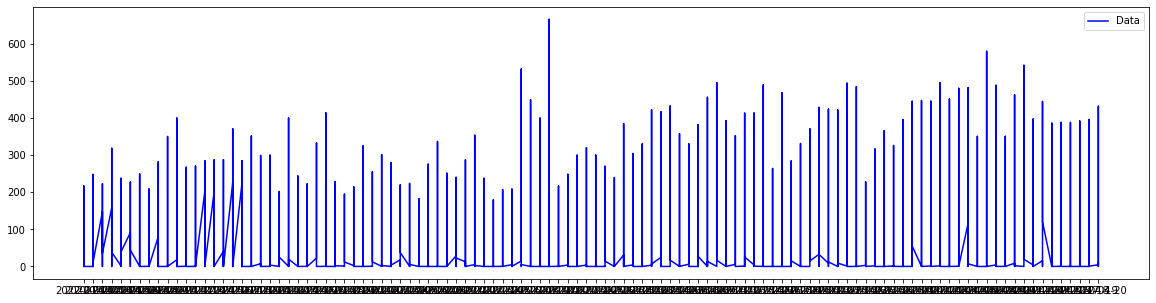

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(catch_product['date'], catch_product['prod_volume'], color='blue', label='Data')
plt.legend()

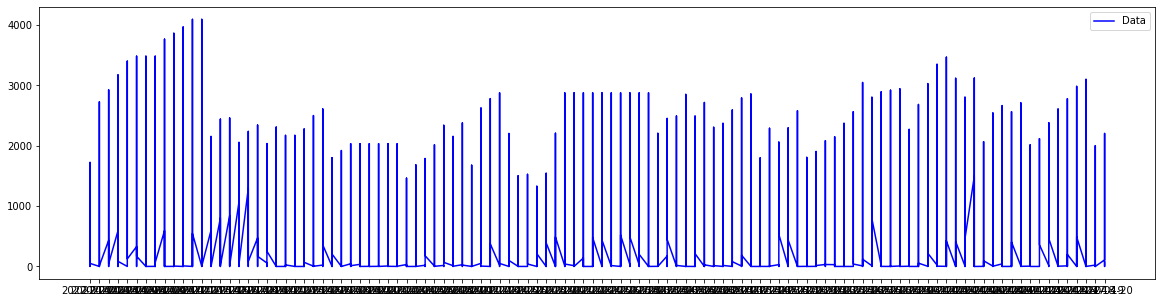

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(catch_product['date'], catch_product['prod_board_volume'], color='blue', label='Data')
plt.legend()

In [20]:
catch_product.shape

(883757, 12)

In [63]:
ext1_2 = pd.merge(ext1, ext2, how="outer", on=['id_vsd'])

In [77]:
ext1_2.head(5)

,id_fishery,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit
0,2208303,6493928,2022-05-24 00:00:00,\N,5022636,8745666,\N,\N,\N,5082710,292,треска,2022-05-24 17:31:35,17522,\N
1,5538439,3846064,2022-05-24 00:00:00,\N,839830,3846313,\N,\N,\N,213740,400,минтай,2022-05-24 17:31:35,72665,\N
2,8688535,3107158,2022-05-24 00:00:00,\N,9310751,5215676,\N,\N,\N,4867595,292,треска,2022-05-24 20:40:39,5250,\N
3,8688535,3107158,2022-05-24 00:00:00,\N,9310751,4008716,\N,\N,\N,6447636,112,палтус белокорый,2022-05-24 20:40:38,243,\N
4,9102536,6493928,2022-05-24 00:00:00,\N,2900344,8522784,\N,\N,\N,2275088,292,треска,2022-05-24 22:43:36,18536,\N


In [73]:
pd.options.display.float_format = '{:.0f}'.format

In [121]:
ext1_2['date'] = pd.to_datetime(ext1_2['date_fishery']).dt.date
ext1_2['time_fishery'] = pd.to_datetime(ext1_2['date_fishery']).dt.time

In [105]:
#ext1_2_wona = ext1_2.dropna(subset = ['id_fishery'],inplace=True)
ext1_2_wona = ext1_2.replace(to_replace='None', value=np.nan).dropna()

# Сравниваем, что судно есть и там, и там

In [76]:
catch_product['id_own'].isin(ext1_2['id_own']).value_counts() #владельцы

True     856339
False    186874
Name: id_own, dtype: int64

In [108]:
ext1_2['id_own'].isin(catch_product['id_own']).value_counts()

False    3106092
True      246414
Name: id_own, dtype: int64

In [107]:
catch_product['id_ves'].isin(ext1_2_wona['id_fishery']).value_counts() #суда

False    1043213
Name: id_ves, dtype: int64

In [106]:
ext1_2_wona['id_fishery'] = ext1_2_wona['id_fishery'].astype(int)

In [95]:
result = ext1_2.dtypes
result

id_fishery        float64
id_own            float64
date_fishery       object
numPart            object
id_Plat           float64
id_vsd              int64
Name_Plat          object
Product_period     object
Region_Plat        object
num_vsd           float64
id_fish           float64
fish               object
date_vsd           object
volume            float64
unit               object
dtype: object

In [97]:
ext1_2['id_fishery'].isnull().sum()

1402

In [84]:
print(ext1_2['id_fishery'].unique())

[ 2.208303e+06  5.538439e+06  8.688535e+06  9.102536e+06  2.219706e+06
  1.409554e+06  7.412083e+06  6.084830e+05  4.128905e+06  2.769750e+06
  5.868605e+06  7.362125e+06  3.022928e+06  4.140694e+06  8.691140e+06
  4.853156e+06  4.312726e+06  7.164214e+06  5.536392e+06  8.519237e+06
  7.943780e+06  8.938434e+06  8.548850e+06  9.301657e+06  1.069273e+06
  2.375353e+06  3.068810e+06  1.271379e+06  9.052033e+06  8.673678e+06
  3.911925e+06  1.453676e+06  8.876016e+06  7.432644e+06  6.791380e+06
  8.883685e+06  1.285124e+06  9.128921e+06  6.350471e+06  8.573165e+06
  3.949342e+06  1.988706e+06  8.076334e+06  6.591042e+06  9.380862e+06
  5.006810e+06  2.946436e+06  6.968933e+06  7.828253e+06  3.329500e+04
  4.800458e+06  1.030269e+06  3.593858e+06  1.010430e+05  2.811150e+06
  4.487588e+06  1.306716e+06  7.483362e+06  4.761827e+06  5.872996e+06
  2.634670e+06  6.169671e+06  2.402426e+06  4.880073e+06  6.607712e+06
  5.019158e+06  5.978123e+06  8.774611e+06  1.190952e+06  5.457324e+06
  4.91

# Сравним объемы хотя бы

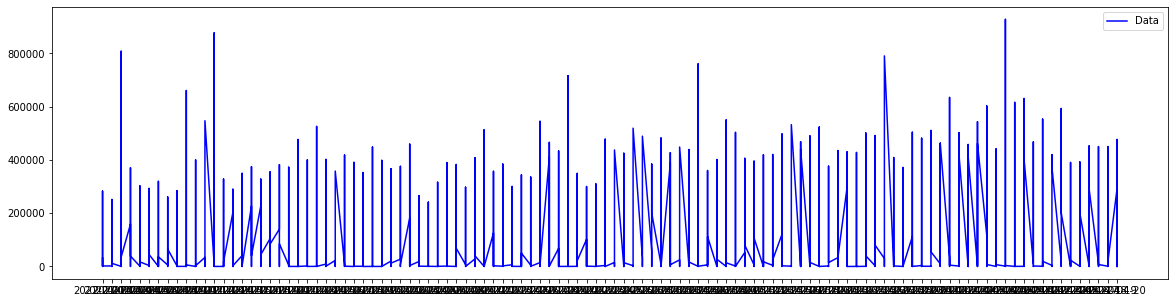

In [117]:
plt.figure(figsize=(20, 5))
plt.plot(catch_product['date'], catch_product['catch_volume'], color='blue', label='Data')
plt.legend()

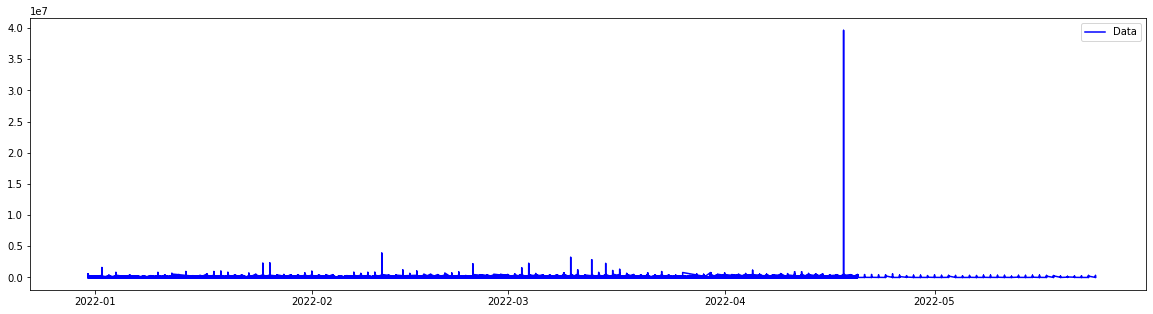

In [122]:
plt.figure(figsize=(20, 5))
plt.plot(ext1_2['date'], ext1_2['volume'], color='blue', label='Data')
plt.legend()

In [124]:
ext12_sorted = ext1_2.sort_values(by=['volume'],ascending=False)
ext12_sorted.head(10)

,id_fishery,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat,num_vsd,id_fish,fish,date_vsd,volume,unit,date,time_fishery
97994,-1,5502023,2022-04-18 02:07:09,\N,657606,4907685,5556653,\N,Камчатский край,2368455,-1,сельдь тихоокеанская н/р мороженая,2022-04-18 02:07:09,39620000,кг,2022-04-18,02:07:09
2059323,-1,5502023,2022-02-11 23:09:41,\N,2345556,8564557,5587239,2022-02-11 00:00:00,Сахалинская область,6046821,292,треска,2022-02-11 23:09:41,3905000,\N,2022-02-11,23:09:41
2059325,576360,9290322,2022-02-11 00:00:00,\N,2345556,8564557,\N,\N,\N,6046821,292,треска,2022-02-11 23:09:41,3905000,\N,2022-02-11,00:00:00
1251785,-1,5502023,2022-03-10 09:18:02,\N,6452785,6671469,9428728,2022-02-23 00:00:00 - 2022-03-08 00:00:00,Мурманская область,1722957,-1,мойва,2022-03-10 09:18:02,3222382,кг,2022-03-10,09:18:02
1171113,-1,5502023,2022-03-13 12:52:18,\N,5716924,3694722,6930294,2022-02-21 00:00:00 - 2022-03-06 00:00:00,Мурманская область,518703,-1,мойва мороженая,2022-03-13 12:52:18,2850705,кг,2022-03-13,12:52:18
1250236,-1,5502023,2022-03-10 09:41:38,\N,6452785,4484587,9428728,2022-02-23 00:00:00 - 2022-03-08 00:00:00,Мурманская область,2934914,-1,мойва мороженая,2022-03-10 09:41:38,2716584,кг,2022-03-10,09:41:38
2580992,-1,5502023,2022-01-26 09:13:20,\N,4390694,2434417,4472866,2022-01-12 00:00:00 - 2022-01-21 00:00:00,Камчатский край,4306164,-1,скумбрия мороженая,2022-01-26 09:13:20,2309096,кг,2022-01-26,09:13:20
2610711,-1,5502023,2022-01-25 10:44:16,\N,2603955,2716226,8206639,2022-01-11 00:00:00 - 2022-01-24 00:00:00,Камчатский край,6037624,-1,минтай мороженый,2022-01-25 10:44:16,2277329,кг,2022-01-25,10:44:16
1423761,-1,5502023,2022-03-04 07:32:26,\N,7814957,3371508,3142981,2022-01-17 00:00:00 - 2022-02-24 00:00:00,Приморский край,5365592,-1,минтай,2022-03-04 07:32:26,2254469,кг,2022-03-04,07:32:26
1094252,-1,5502023,2022-03-15 17:41:37,\N,9394691,4129979,7550205,2022-02-22 00:00:00 - 2022-03-10 00:00:00,Мурманская область,8212976,-1,путассу н/р мороженая,2022-03-15 17:41:37,2244000,кг,2022-03-15,17:41:37


In [128]:
ext12_sorted_wo.head()

AttributeError: 'NoneType' object has no attribute 'head'

# Сгруппируем по типу рыбы, посмотрим что и как 

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(catch_product['id_fish'], catch_product['catch_volume'], color='blue', label='Data')
plt.legend()